In [1]:
from numpy import linspace
from matplotlib.pyplot import plot
from sympy import expand, var

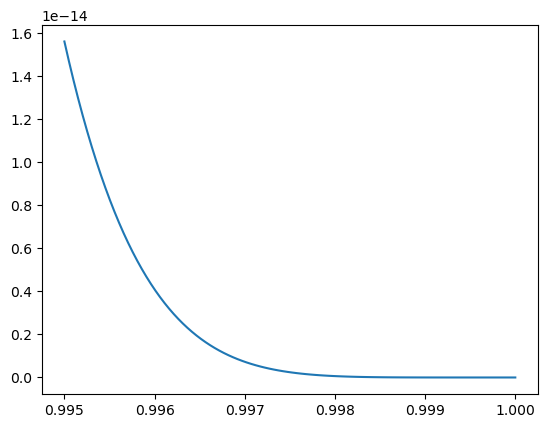

In [24]:
x = linspace(.995, 1, 100)
y = (x - 1) ** 6
plot(x, y)

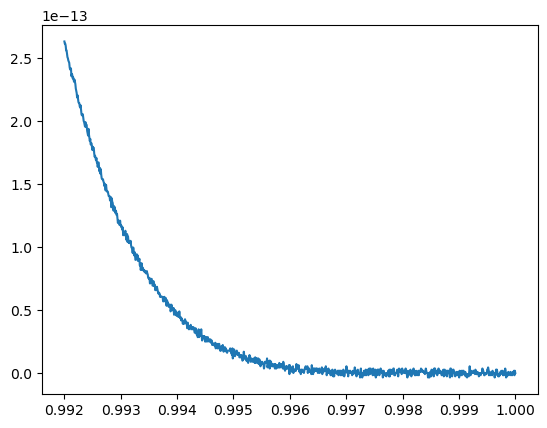

In [3]:
x = linspace(.992, 1, 1029)
y = x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1
plot(x, y)
# The code is not able to roud correctly (bad conditioned) The error propagates on more critical operations like the sum. In the previous case only one.

In [4]:
def FD(f, x, h):
    return (f(x + h) - f(x)) / h

def CFD(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def myfun(x):
    return sin(x)

def exact(x):
    return cos(x)

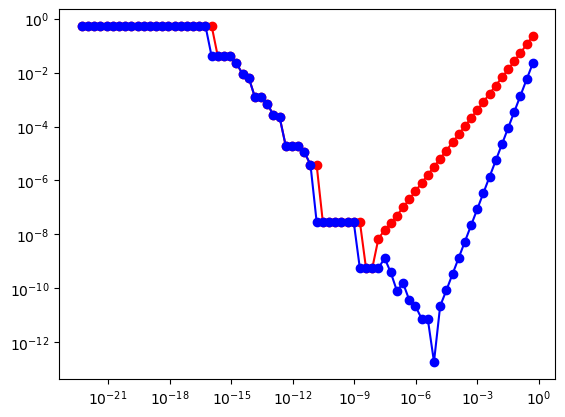

In [5]:
from matplotlib.pyplot import loglog

x0 = 1

H = [2 ** (-i) for i in range(1, 75)]
error = [abs(exact(x0) - FD(myfun, x0, h)) for h in H]
error2 = [abs(exact(x0) - CFD(myfun, x0, h)) for h in H]
loglog(H, error, 'ro-')
loglog(H, error2, 'bo-')
# If H is not too small we obtain a linear deterministic trend. After a certain point the error
# starts to increase. This is due to the fact that f(x + h) - f(x) tends to zero so we are in a bad conditioned situation.
# Because the machine precision is not enough to represent the difference between f(x + h) and f(x) and the error is amplified (in the smaller intervall).
# In the last part we are closed to 1 since the numerical solution is too far from the exact one. 